In [1]:
# Importing necessary libraries

from stoneforge.petrophysics.shale_volume import vshale_linear, vshale_larionov_old, vshale_larionov, vshale_clavier, vshale_stieber, vshale_neu_den
from stoneforge.vis import wellplot
from stoneforge.data_management.preprocessing import DataLoader

import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None

In [2]:
# Accessing Internal Dataframe for IK1 Well

DATA = DataLoader(r"https://raw.githubusercontent.com/giecaruff/datasets/refs/heads/main/wells/las2/npra/IK1.las", filetype='las2')
data_IK1, units_IK1 = DATA.dataframe(DATA.data_obj.data)
data_IK1

,DEPT,SP,ILD,ILM,LL8,GR,CALI,RHOB,DRHO,NPHI,DT
0,81.0,-999.0,-999.0,-999.0,-999.0,79.7502,-999.0,-999.0,-999.0,-999.0,-999.0
1,81.5,-999.0,-999.0,-999.0,-999.0,79.9790,-999.0,-999.0,-999.0,-999.0,-999.0
2,82.0,-999.0,-999.0,-999.0,-999.0,79.8643,-999.0,-999.0,-999.0,-999.0,-999.0
3,82.5,-999.0,-999.0,-999.0,-999.0,79.9446,-999.0,-999.0,-999.0,-999.0,-999.0
4,83.0,-999.0,-999.0,-999.0,-999.0,80.1459,-999.0,-999.0,-999.0,-999.0,-999.0
...,...,...,...,...,...,...,...,...,...,...,...
30796,15479.0,-999.0,-999.0,-999.0,-999.0,-999.0000,-999.0,-999.0,-999.0,-999.0,-999.0
30797,15479.5,-999.0,-999.0,-999.0,-999.0,-999.0000,-999.0,-999.0,-999.0,-999.0,-999.0
30798,15480.0,-999.0,-999.0,-999.0,-999.0,-999.0000,-999.0,-999.0,-999.0,-999.0,-999.0
30799,15480.5,-999.0,-999.0,-999.0,-999.0,-999.0000,-999.0,-999.0,-999.0,-999.0,-999.0


In [3]:
# Accessing Internal Dataframe units for IK1 Well

print(units_IK1)

{'DEPT': 'F', 'SP': 'MV', 'ILD': 'OHMM', 'ILM': 'OHMM', 'LL8': 'OHMM', 'GR': 'GAPI', 'CALI': 'IN', 'RHOB': 'G/C3', 'DRHO': 'G/C3', 'NPHI': '%', 'DT': 'US/F'}


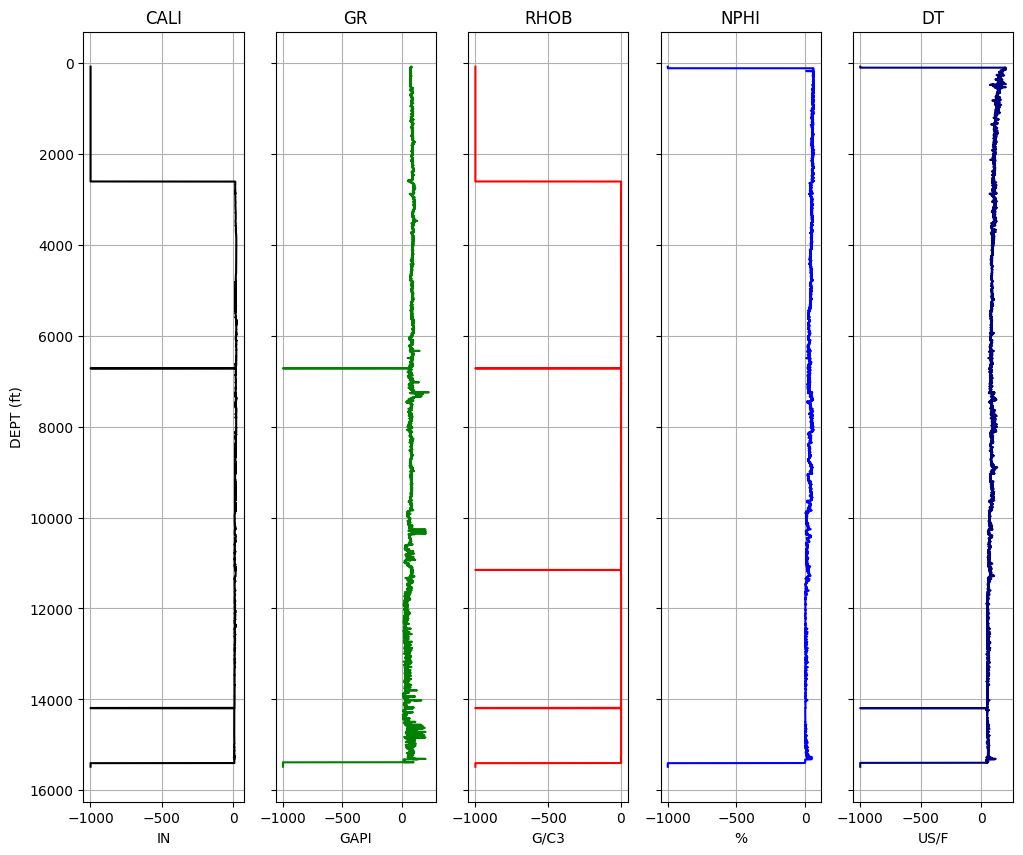

In [4]:
# Viewing Well Log Data

curves = ["CALI","GR","RHOB","NPHI","DT"]
units = []
for c in curves:
    units.append(units_IK1[c])

color = ["k","g","r","b","navy"]

wellplot(data_IK1,"DEPT",curves, color, units, d_unit='ft')

In [5]:
# Removing specific values
# OBS: you can use "df.dropna(inplace=True)" to remove all np.nan values

data_IK1_c = data_IK1[~data_IK1.isin([-999.0]).any(axis=1)]
data_IK1_c

,DEPT,SP,ILD,ILM,LL8,GR,CALI,RHOB,DRHO,NPHI,DT
5050,2606.0,-49.0435,8.79390,8.61980,10.12370,58.4196,12.7783,2.2600,-0.2832,53.4228,93.7696
5051,2606.5,-50.4799,8.77080,8.59250,9.92250,59.8769,12.8500,2.2708,-0.3078,53.2102,93.4603
5052,2607.0,-52.1082,8.74770,8.53700,11.22560,61.2937,12.9218,2.2329,-0.3134,52.3063,92.4409
5053,2607.5,-51.1442,8.72480,8.48190,11.70970,63.3657,12.9935,2.2289,-0.2684,50.3678,92.9883
5054,2608.0,-47.5747,8.95780,8.42720,10.47900,65.9798,13.0652,2.2394,-0.1042,50.0560,93.7045
...,...,...,...,...,...,...,...,...,...,...,...
30506,15334.0,-11.3880,629.85712,1703.66248,1422.14807,16.8156,6.9289,2.6577,0.0468,-0.9550,54.3735
30507,15334.5,-5.4272,615.84058,1695.59717,1417.44800,16.3250,6.9282,2.6595,0.0582,-0.9549,47.2565
30508,15335.0,-7.8805,740.49573,1719.76306,1412.76270,15.7515,6.9275,2.6887,0.0742,-0.9566,41.9826
30509,15335.5,-9.9414,807.49799,1757.75037,1408.09375,15.6002,6.9268,2.6746,0.0637,-0.9584,38.9155


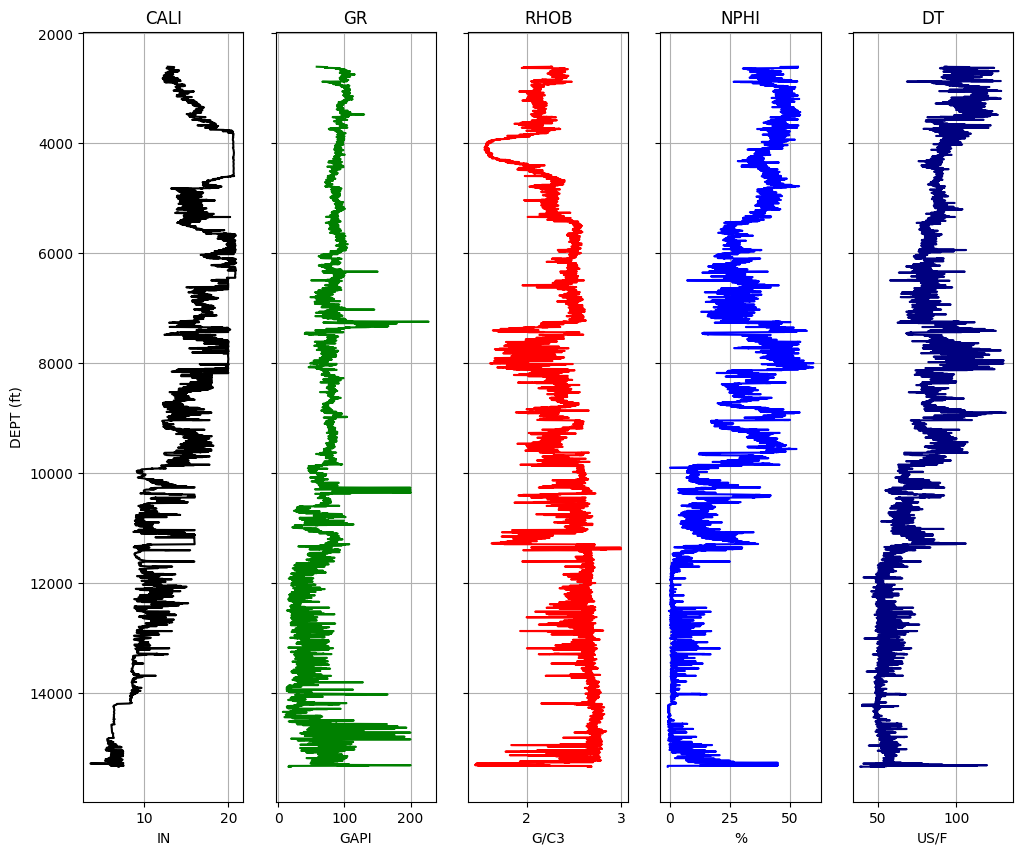

In [6]:
# Viewing Cleaned Well Log Data

wellplot(data_IK1_c,"DEPT",curves, color, units, d_unit='ft')

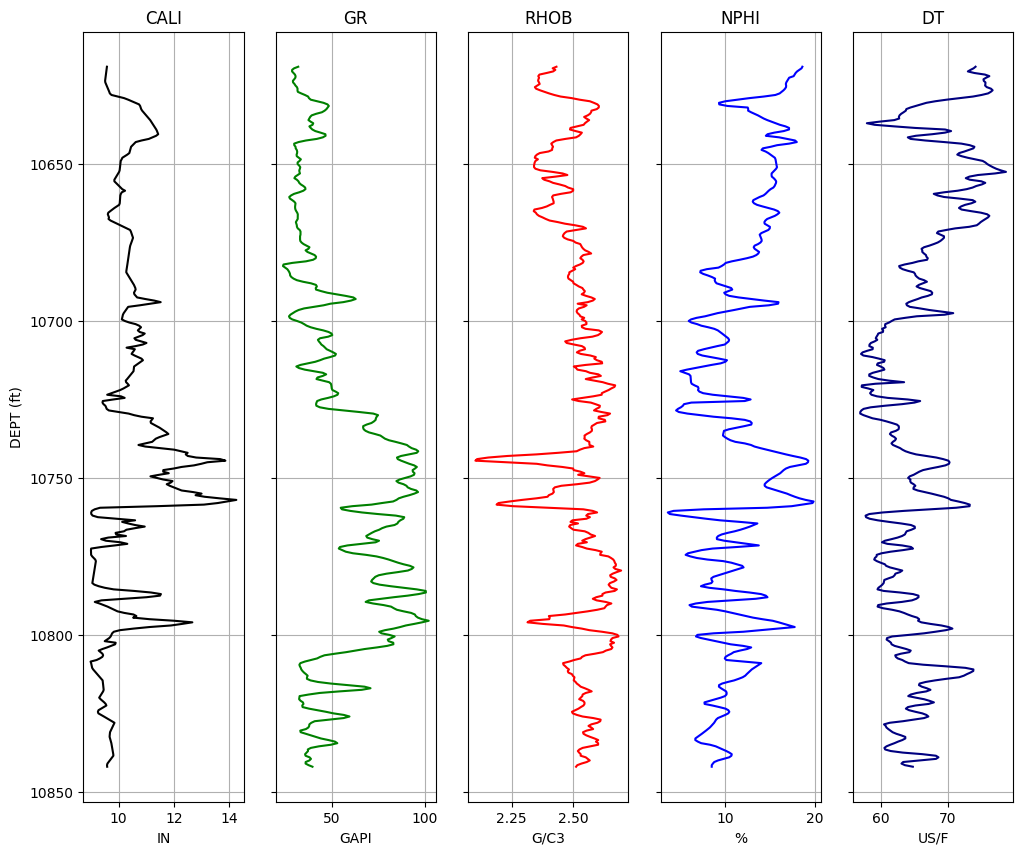

In [7]:
# Taking specific range in depth for analysis (ledge sandstone interval)

LEDGE_SANDSTONE = data_IK1_c[data_IK1_c['DEPT'].between(10619, 10842)]
wellplot(LEDGE_SANDSTONE,"DEPT",curves, color, units, d_unit='ft')

In [8]:
# VSH Calculations

GR = np.array(LEDGE_SANDSTONE["GR"])
GR_min = np.percentile(GR, 10)
GR_max = np.percentile(GR, 90)
print("GR_min:",GR_min,"|GR_max:",GR_max)

NPHI = np.array(LEDGE_SANDSTONE["NPHI"])/100.
RHOB = np.array(LEDGE_SANDSTONE["RHOB"])

VSH = {
    "DEPTH":LEDGE_SANDSTONE["DEPT"],
    "VSH_linear":vshale_linear(gr=GR,grmin=GR_min,grmax=GR_max),
    "VSH_larionov":vshale_larionov(gr=GR,grmin=GR_min,grmax=GR_max),
    "VSH_larionov_old":vshale_larionov_old(gr=GR,grmin=GR_min,grmax=GR_max),
    "VSH_clavier":vshale_clavier(gr=GR,grmin=GR_min,grmax=GR_max),
    "VSH_stieber":vshale_stieber(gr=GR,grmin=GR_min,grmax=GR_max),
    "VSH_Bhuyan_Passey":vshale_neu_den(NPHI, RHOB)
}

LEDGE_SANDSTONE_VSH = pd.DataFrame(VSH)

GR_min: 30.78398 |GR_max: 88.65426000000001


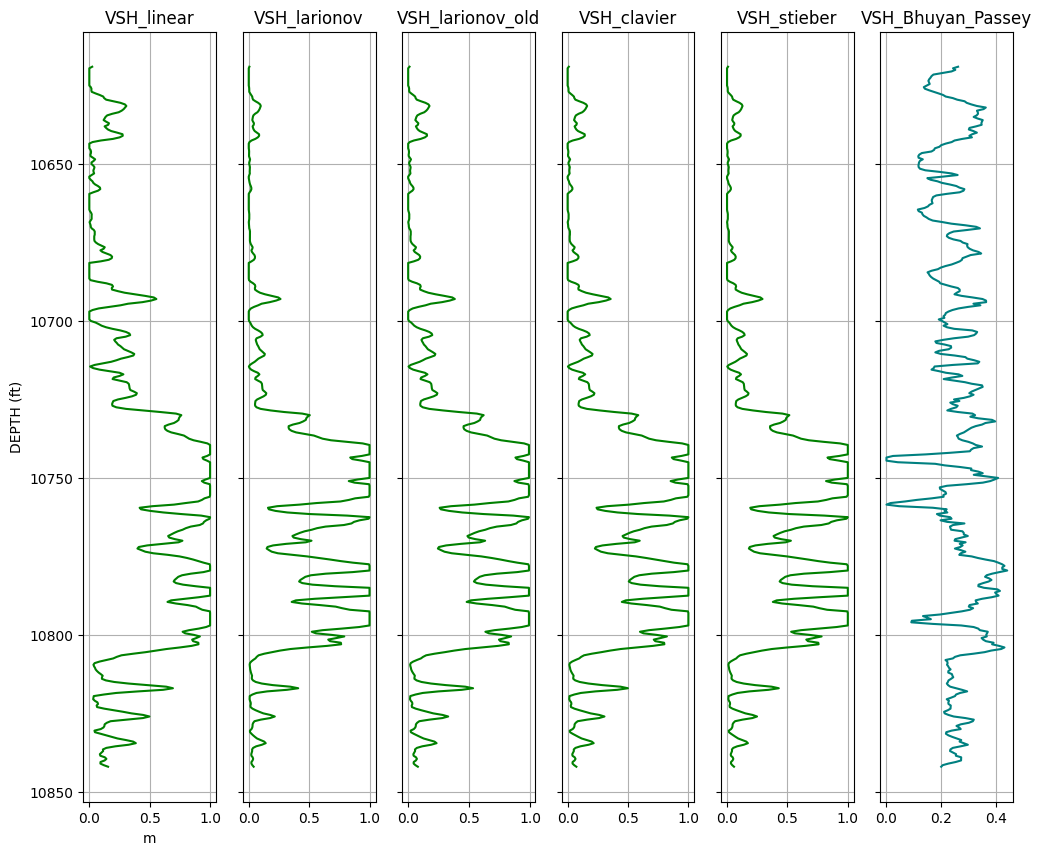

In [9]:
# Plotting VSH results

curves = ["VSH_linear","VSH_larionov","VSH_larionov_old","VSH_clavier","VSH_stieber","VSH_Bhuyan_Passey"]
units = ["m","","","","","",""]
color = ["g","g","g","g","g","teal"]

wellplot(LEDGE_SANDSTONE_VSH,"DEPTH",curves, color, units, d_unit='ft')